In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import pandas as pd

FILE = "/content/drive/MyDrive/03 - Brand/Projects/Covid 19/"

In [41]:
death = pd.read_csv(FILE+'deaths.csv')
death_area = death[['country','expected_deaths', 'excess_deaths']].groupby('country').sum()
death_area['death.ratio'] = death_area['excess_deaths']/death_area['expected_deaths']

In [42]:
gdp = pd.read_csv(FILE+'GDP.csv')
gdp['gdp.change'] = gdp['2020']-gdp['2019']

In [43]:
death.gdp = pd.merge(left=death_area, right=gdp, how='outer', left_on='country',right_on='country')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [46]:
death.gdp.head(1)

,country,expected_deaths,excess_deaths,death.ratio,2019,2020,gdp.change
0,Austria,76621.0,6877.0,0.089753,1.6,-6.7,-8.3


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

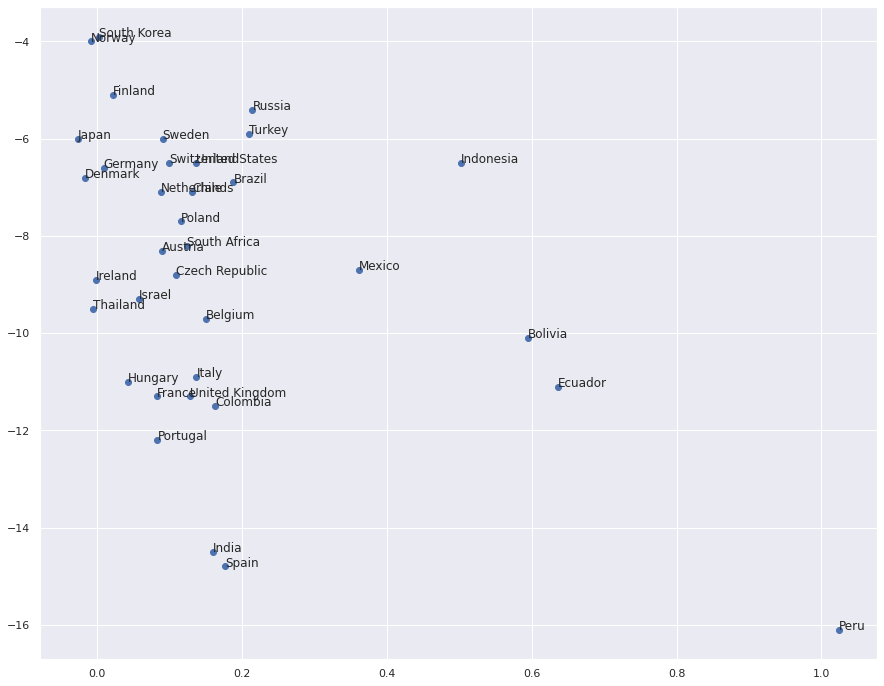

In [84]:
plt.rcParams["figure.figsize"] = (15,12)

fig, ax = plt.subplots()
ax.scatter(death.gdp['death.ratio'], death.gdp['gdp.change'])

for i, txt in enumerate(death.gdp['country']):
    ax.annotate(txt, (death.gdp['death.ratio'][i], death.gdp['gdp.change'][i]))

plt.savefig("death_gdp.png",dpi=300)
files.download("death_gdp.png") 

In [86]:
death.gdp.to_csv('death_gdp.csv')
files.download("death_gdp.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>